# Klassifikation mit k-nächste-Nachbarn
### - Aufgabe - 

### Auf gute Nachbarschaft!

Diese Aufgabe befasst sich mit einem Standardverfahren der Klassifikation, dem k-nächste-Nachbarn Verfahren. Hier siehst du ein Bild, welches das Verfahren beschreibt:

![kNN.png](./assets/images/kNN.png)

Du siehst in rot eingezeichnet Datenpunkte, die zu einer Klasse A gehören und in blau Datenpunkte, die zu einer Klasse B gehören. Nun bekommst du einen neuen Datenpunkt (in grün) und willst bestimmen, zu welcher Klasse dieser Punkt gehören soll.
Die Idee des k-nächste-Nachbarn Verfahren ist, dass Datenpunkte, die in räumlicher Nähe sind, auch zu der selben Klasse gehören. In diesem Fall würde man den grünen Punkt also zu der Klasse B zuordnen, da mehr blaue Punkte in der Nachbarschaft sind.

Das Verfahren nennt man k-nächste-Nachbarn, da man nun auswählen kann, wie viele der nächsten Nachbarn in diese Betrachtung einbezogen werden sollen. Der Parameter, der die Anzahl der betrachteten Nachbarn beschreibt, heißt "k".

In dem Beispiel oben sind die k = 5 nächsten Nachbarn zum grünen Punkt folgende: blau, blau, rot, blau, blau.
Würde man den Parameter k = 1 wählen, so würde nur der nächste blaue Punkt berücksichtigt. Wäre der Parameter k = 4, so würden die Nachbarn blau, blau, rot, blau betrachtet. In allen Fällen überwiegen die blauen Nachbarn aus Klasse B, und so würde der neue Punkt zu Klasse B zugeordnet.

Weitere Informationen zu dem Verfahren kannst du z. B. hier finden: https://de.wikipedia.org/wiki/N%C3%A4chste-Nachbarn-Klassifikation.

Wir benötigen für das Verfahren also auf jeden Fall eine Funktion, die die Distanz zwischen zwei Punkten in der Ebene zurückgibt. Diese Funktion kannst du schon einmal implementieren. Wir verwenden hier die euklidische Distanz, es sind dafür aber noch andere Distanzfunktionen möglich.

Wenn du AssertionErrors bekommst, ist deine Funktion noch nicht richtig.

In [1]:
# wir brauchen das Modul "math" für u. a. die Wurzelfunktion "sqrt()"
import math

# diese Funktion gibt die Distanz zwischen zwei Punkten zurück
# du kannst dazu den Satz des Pythagoras verwenden
# https://de.wikipedia.org/wiki/Satz_des_Pythagoras
def distanz(punkt_1, punkt_2):
    distanz_x = ...
    distanz_y = ...
    return math.sqrt(...)

# teste die Funktion auf Korrektheit
assert distanz([0, 0], [1, 0]) == 1
assert distanz([1, 0], [0, 0]) == 1
assert distanz([0, 0], [0, 1]) == 1
assert distanz([0, 1], [0, 0]) == 1
assert distanz([0, 0], [3, 5]) == math.sqrt(34)
assert distanz([4, 13], [3, 5]) == math.sqrt(65)

### Größe zeigt sich im Kleinen

Nun wollen wir an einem aufgenommenen Datensatz das k-nächste-Nachbarn Verfahren implementieren.
Schau dir dazu zunächst den Datensatz als Text an: [bwki/GroessenMaennerFrauenDatensatzBereinigtTraining.txt](./assets/GroessenMaennerFrauenDatensatzBereinigtTraining.txt). Der Datensatz enthält Körper- und Schuhgrößen von Personen und deren Geschlecht; wir nennen ihn Trainingsdatensatz.

Die Quelle für diesen Datensatz ist https://osf.io/ja9dw/, erstellt wurde er von Sebastian Sauer. Daraufhin wurde der Datensatz noch etwas bereinigt, um ihn einfacher verwendbar zu machen. (Die Lizenz für diesen Datensatz ist eine CC-By Attribution 4.0 Lizenz.)

Die Daten enthalten also drei Spalten, jeweils durch Komma getrennt: Geschlecht (Frau/Mann), Körpergröße (in Zentimetern) und Schuhgröße (nach europäischem Maß).

Nun wollen wir den Datensatz zunächst graphisch darstellen, dazu verwenden wir die Module "pandas" und "matplotlib". Die Daten werden in einem sog. Streudiagramm (engl. "Scatterplot") dargestellt, auf der x-Achse wird die Körpergröße aufgetragen und auf der y-Achse die Schuhgröße. Das Geschlecht der Personen, zu denen die Daten gehören wird mit den Farben Rot (weiblich) und Blau (männlich) dargestellt. 

In [2]:
# zunächst laden wir den Datensatz, dazu brauchen wird das Modul "pandas"
# Pandas ist eine Bibliothek, die im maschinellen Lernen viel eingesetzt wird.
# Du kannst hier weitere Informationen zu Pandas finden (leider nur auf Englisch):
# https://pandas.pydata.org/
# Hier gibt es ein Pandas Tutorial (leider auch nur auf Englisch):
# https://www.tutorialspoint.com/python_pandas/python_pandas_introduction.htm
import pandas as pd

# die URL zu der Datei, die die Trainingsdaten im csv-Format enthält
# https://de.wikipedia.org/wiki/CSV_(Dateiformat)
url_training = "./assets/GroessenMaennerFrauenDatensatzBereinigtTraining.txt"

# zunächst importieren wir den Datensatz in ein sog. pandas-Dataframe (pandas-Datenrahmen)
datensatz_training = pd.read_csv(url_training)

# und zeigen ihn als Tabelle an
datensatz_training

,Geschlecht,Koerpergroesse,Schuhgroesse
0,Frau,160,40
1,Frau,171,39
2,Frau,174,39
3,Frau,176,40
4,Mann,195,46
...,...,...,...
95,Frau,170,39
96,Frau,183,39
97,Frau,173,40
98,Frau,160,37


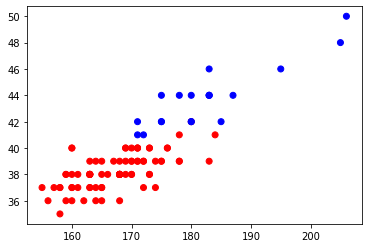

In [3]:
# zum Zeichnen der Daten verwenden wir matplotlib, also laden dieses Modul
import matplotlib.pyplot as plt

# hier bestimmen wir die Farbe pro Datenpunkt, die wir im Scatterplot verwenden wollen
# (abhängig davon, ob der Datenpunkt zu einer Frau oder zu einem Mann gehört)
def farbe(zeile):
    if zeile['Geschlecht'] == "Frau":
        return "red"
    return "blue"
# die lambda-Funktion "farbe()" wird auf alle Zeilen angewandt und damit wird eine Liste
# der zu verwendenden Farben erstellt
farben_training = datensatz_training.apply(lambda zeile: farbe(zeile), axis=1)

# mit diesen Farben zeichnen wir nun den Scatterplot
plt.scatter(datensatz_training.Koerpergroesse, datensatz_training.Schuhgroesse, c = farben_training)

Ersetze in der nächsten Zelle die ... durch die Antwort, die den Satz richtig vervollständigt.

In [4]:
# In diesem Scatterplot kann man nun einige Informationen der Trainingsdaten direkt erkennen:

# a) Es gibt mehr Datenpunkte von ... (Frauen/Männern) als von ... (Frauen/Männern).
# b) Frauen haben im Mittel ... (größere/kleinere) Körper- und ... (größere/kleinere) Schuhgrößen als Männer.
# c) In der Tendenz gilt: je größer jemand ist, desto ... (größere/kleinere) Schuhe braucht diese Person.

Die Aussage von c) nennt man positive Korrelation.

### Was sollen denn da die Nachbarn denken?

Jetzt wollen wir das k-nächste Nachbarn Verfahren implementieren, um neue Datenpunkte den Geschlechtern zuzuordnen. Dazu gibt es einen weiteren Datensatz, den man Testdatensatz nennt. Du findest diesen Datesatz hier: [bwki/GroessenMaennerFrauenDatensatzBereinigtTest.txt](./assets/GroessenMaennerFrauenDatensatzBereinigtTest.txt).

Beachte: der Testdatensatz ist gleich aufgebaut wie der Trainingsdatensatz, hat aber weniger Datenpunkte.

Aber warum haben wir nun zwei Datensätze? Im maschinellen Lernen wird das so gehandhabt: man hat einen Satz an __Trainingsdaten__, auf denen das System eine Fähigkeit lernt. Diese Fähigkeit ist in dieser Aufgabe das Klassifizieren von Frauen und Männern. Man hat aber noch einen unbenutzten __Testdatensatz__, mit dem bestimmt werden kann, wie gut das System auf noch nie zuvor gesehenen Daten arbeitet. So kann man eine Aussage darüber treffen, ob das System sinnvolle Ergebnisse liefert.

Dazu tun wir so, als ob wir in den Testdaten das Geschlecht nicht kennen würden, obwohl es ja in der Tabelle dabei steht. Wir lassen das k-nächste-Nachbarn Verfahren das Geschlecht bestimmen und vergleichen dann mit dem wahren Wert in der Tabelle, in wie weit das Verfahren das Geschlecht der Personen korrekt klassifiziert hat.

Wichtig an dieser Stelle: man darf die Testdaten nur einmal am Ende der Entwicklung des Systems zur Bewertung verwenden. Wenn man anhand der Ergebnisse dieser Bewertung nun das System noch verbessern würde, so wären die Testdaten nur weitere Trainingsdaten gewesen und man müsste neue Daten für die Bewertung sammeln.

Das Lernen ist beim k-nächste-Nachbarn Verfahren trivial: das System kann sofort klassifizieren, da es nicht erst Informationen aus den Daten extrahieren muss. Dennoch verwenden wir in dieser Aufgabe Trainings- und Testdaten, um diese Vorgehensweise zu veranschaulichen.

In [5]:
# die URL zu der Datei, die die Testdaten im csv-Format enthält
url_test = "./assets/GroessenMaennerFrauenDatensatzBereinigtTest.txt"

# zunächst importieren wir den Datensatz in ein sog. pandas-Dataframe (pandas-Datenrahmen)
datensatz_test = pd.read_csv(url_test)

# und zeigen ihn als Tabelle an
datensatz_test

,Geschlecht,Koerpergroesse,Schuhgroesse
0,Frau,161,41
1,Mann,175,43
2,Frau,159,39
3,Frau,176,40
4,Mann,181,44
5,Mann,178,42
6,Frau,157,37
7,Frau,160,38
8,Mann,169,41
9,Mann,182,43


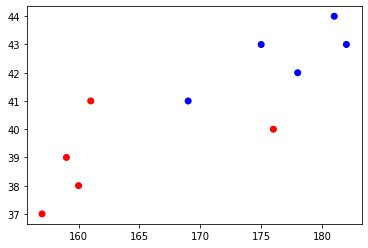

In [6]:
# wir fügen wieder die Farben hinzu
farben_test = datensatz_test.apply(lambda zeile: farbe(zeile), axis=1)

# mit diesen Farben zeichnen wir nun den Scatterplot
plt.scatter(datensatz_test.Koerpergroesse, datensatz_test.Schuhgroesse, c = farben_test)

Für das k-nächste-Nachbarn Verfahren musst du natürlich die nächsten Nachbarn ermitteln. Berechne dazu die Distanz vom gegebenen Testpunkt zu allen Trainingsdatenpunkten. Du kannst dazu die "distanz"-Funktion verwenden, die du oben implementiert hast.

Dabei musst du dir auch merken, zu welchem der Trainingsdatenpunkte die Distanz jeweils gehört. Speichere diese Datenpaare (Trainingsdatenpunktnummer, Distanz zum Testpunkt) also in eine Liste. Sortiere dann diese Liste nach den Distanzwerten, woraufhin die räumlich nächsten Nachbarn zum Testpunkt vorne in der Liste sind. Gib diese Liste dann zurück.

Wenn du AssertionErrors bekommst, ist deine Funktion noch nicht richtig.

In [7]:
# in dieser Funktion werden die Distanzwerte eines Testpunkts zu allen Trainingspunkten bestimmt
# und die Liste nach Distanzen sortiert zurückgegeben
def erstelleSortierteListeAllerAbstände(testpunkt, trainingspunkte):
    # Liste, die gefüllt werden soll
    liste = []
    
    # i ist die Trainingsdatenpunktnummer
    for i in range(len(trainingspunkte)):
        liste.append((i, ...))
    
    # sortiere die Liste nach der Distanz und gib sie zurück
    return sorted(liste, key=lambda distanz: distanz[1])

# führe die Funktion auf einigen beliebig gewählten Punkten aus und überprüfe auf Korrektheit
test_liste = erstelleSortierteListeAllerAbstände([1, 2], [[5, 7], [3, 8], [2, 3], [1, 2.1]])
assert test_liste == [(3, 0.10000000000000009), (2, 1.4142135623730951), (1, 6.324555320336759), (0, 6.4031242374328485)]

Implementiere nun das k-nächste-Nachbarn Klassifikationsverfahren. Iteriere über alle Testpunkte, d.h. gehe alle Testpunkte durch, und speichere für jeden davon das Geschlecht, das das Klassifikationsverfahren ermittelt.

Wir wählen k = 5, wir wollen also die fünf nächsten Nachbarn zu jedem Testpunkt ermitteln. Das sind die fünf ersten Elemente der Liste, die dir die gerade erstellte Funktion zurückgibt. Finde über die Trainingsdatenpunktnummern heraus, zu welchem Geschlecht die Nachbarn jeweils gehören und wähle die Mehrheit des Geschlechts als das Geschlecht deines Testpunkts. Füge das gewählte Geschlecht in eine neue Spalte "Geschlecht_vorhergesagt" zum Testdatensatz (datensatz_test) hinzu.

Wenn du AssertionErrors bekommst, ist deine Funktion noch nicht richtig.

In [8]:
# in dieser Funktion wird das k-nächste-Nachbarn Klassifikationsverfahren durchgeführt
def knn(k, trainingsdaten, testdaten):
    # extrahiere die Koordinaten der Datenpunkte aus den pandas-Datenrahmen
    trainingspunkte = list(zip(trainingsdaten.Koerpergroesse, trainingsdaten.Schuhgroesse))
    testpunkte = list(zip(testdaten.Koerpergroesse, testdaten.Schuhgroesse))
    
    # lege eine Liste an, in die die Vorhersagen über das Geschlecht gespeichert werden
    geschlechter_vorhergesagt = []
    
    # iteriere über alle Punkte im Testdatensatz
    for testpunkt in testpunkte:
        # bestimme alle Nachbarn zum aktuellen Testpunkt, sortiert nach Abstand
        alle_nachbarn = erstelleSortierteListeAllerAbstände(..., ...)
        # nehme nur die ersten k Nachbarn
        k_nachbarn = ...
        # finde die Nummern (Indices) der Nachbarn im Testdatensatz heraus
        k_nachbarn_nummern = ...
        # hole die Datenzeile zu den Nummern und daraus die Geschlechter
        k_nachbarn_geschlechter = ...
        # bestimme das Geschlecht, das in der Mehrheit ist (Tipp: verwende die .mode()-Funktion)
        k_nachbarn_geschlecht_mehrheit = ...
        # füge das Geschlecht als Zeichenkette in die Liste der vorhergesagten Geschlechter ein
        geschlechter_vorhergesagt.append(k_nachbarn_geschlecht_mehrheit.to_string(index=False).replace(" ", ""))
    
    # gib die Vorhersagen zurück
    return geschlechter_vorhergesagt

# führe das k-nächste-Nachbarn Klassifikationsverfahren durch
geschlechter_vorhergesagt = knn(5, datensatz_training, datensatz_test)

# teste, ob das erwartete Ergebnis zurückgegeben wurde
assert geschlechter_vorhergesagt == ['Frau', 'Mann', 'Frau', 'Frau', 'Mann', 'Mann', 'Frau', 'Frau', 'Frau', 'Mann']

# füge die Vorhersage in den pandas-Datenrahmen ein und zeige ihn als Tabelle an
datensatz_test["Geschlecht_vorhergesagt"] = geschlechter_vorhergesagt
datensatz_test

,Geschlecht,Koerpergroesse,Schuhgroesse,Geschlecht_vorhergesagt
0,Frau,161,41,Frau
1,Mann,175,43,Mann
2,Frau,159,39,Frau
3,Frau,176,40,Frau
4,Mann,181,44,Mann
5,Mann,178,42,Mann
6,Frau,157,37,Frau
7,Frau,160,38,Frau
8,Mann,169,41,Frau
9,Mann,182,43,Mann


Nun haben wir eine Vorhersage, die in fast allen Fällen richtig war. Nun können wir bestimmen, in welchen Fällen die Vorhersage falsch lag und dies in einen Scatterplot einzeichnen. Zudem können wir den Prozentsatz falscher Vorhersagen bestimmen.

Prozentsatz falsch vorhergesagter Datenpunkte: 10%


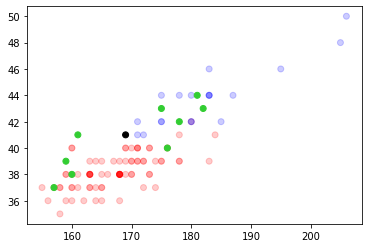

In [9]:
# in dieser Funktion wird ermittelt, wie viele der vorhergesagten Geschlechter richtig waren
def prozentsatzFalschVorhergesagt(datensatz):
    falsch_vorhergesagt = datensatz.apply(lambda zeile: 1 if zeile.Geschlecht != zeile.Geschlecht_vorhergesagt else 0, axis=1)
    prozentsatz_falscher_vorhersagen = ...
    return round(prozentsatz_falscher_vorhersagen * 100)

# ermittle, in wie vielen Fällen die Klassifikation nicht korrekt war
prozentsatz_falsch_vorhergesagt = prozentsatzFalschVorhergesagt(datensatz_test)
print("Prozentsatz falsch vorhergesagter Datenpunkte: " + str(prozentsatz_falsch_vorhergesagt) + "%")

# zeichne in einen Scatterplot in Pastelltönen die Trainingsdaten und in grün und schwarz
# ob die Vorhersage richtig war (grün für richtig, schwarz für falsch)
farbeVorhersageRichtig = datensatz_test.apply(lambda zeile: "black" if zeile.Geschlecht != zeile.Geschlecht_vorhergesagt else "limegreen", axis=1)
plt.scatter(datensatz_training.Koerpergroesse, datensatz_training.Schuhgroesse, alpha = 0.2, c = farben_training)
plt.scatter(datensatz_test.Koerpergroesse, datensatz_test.Schuhgroesse, c = farbeVorhersageRichtig)

Wie du siehst, wird der überwiegende Teil der Testdatenpunkte richtig als Frauen oder Männer klassifiziert. Nur der schwarze Datenpunkt, der in einem Grenzbereich liegt und bei dem die Zuordnung schwierig ist, wurde fehlerhaft klassifiziert. Solche Missklassifikationen sind meist unvermeidlich, wenn es Klassenüberschneidungen in den Trainingsdaten gibt.

Wir haben unseren k-nächste-Nachbarn-Klassifikator also validiert und könnten diesen nun für neue, bisher noch nicht betrachtete Daten verwenden.

Anmerkung: auf eine Normalisierung der Achsen wurde in dieser Aufgabe verzichtet.

## Zusatzaufgabe

Teste verschiedene Werte für k und bestimme (falls möglich) einen Wert, der noch besser funktioniert als k = 5.

## Fragen & Feedback:

**Wenn ihr Fragen oder Anregungen zu der Aufgabe (oder Lösung) habt, dann tauscht euch gerne im [Chat](https://spectrum.chat/bwki/aufgabenarchiv/) darüber aus oder schreibt uns eine E-Mail (an info@bw-ki.de).**

Wir freuen uns auch immer über **Feedback** (auch unter info@bw-ki.de):

- War diese Aufgabe zu leicht, zu schwer oder genau richtig?
- Wie lang hast du für diese Aufgabe ungefähr gebraucht?
- Welche Art von Aufgaben wünschst du dir in Zukunft?